In [1]:
from src.utils import (check_labels, save_model, plot_img, unfreeze_params, \
                      find_best_params, load_and_transform)
from src.basic_model import BasicViT

import torch
import torch.nn as nn
from torchvision.datasets import Flowers102
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor, Compose, Lambda, Resize
import numpy as np
import matplotlib.pyplot as plt
from torchvision.models import vit_b_16, ViT_B_16_Weights

In [2]:
torch.cuda.empty_cache()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

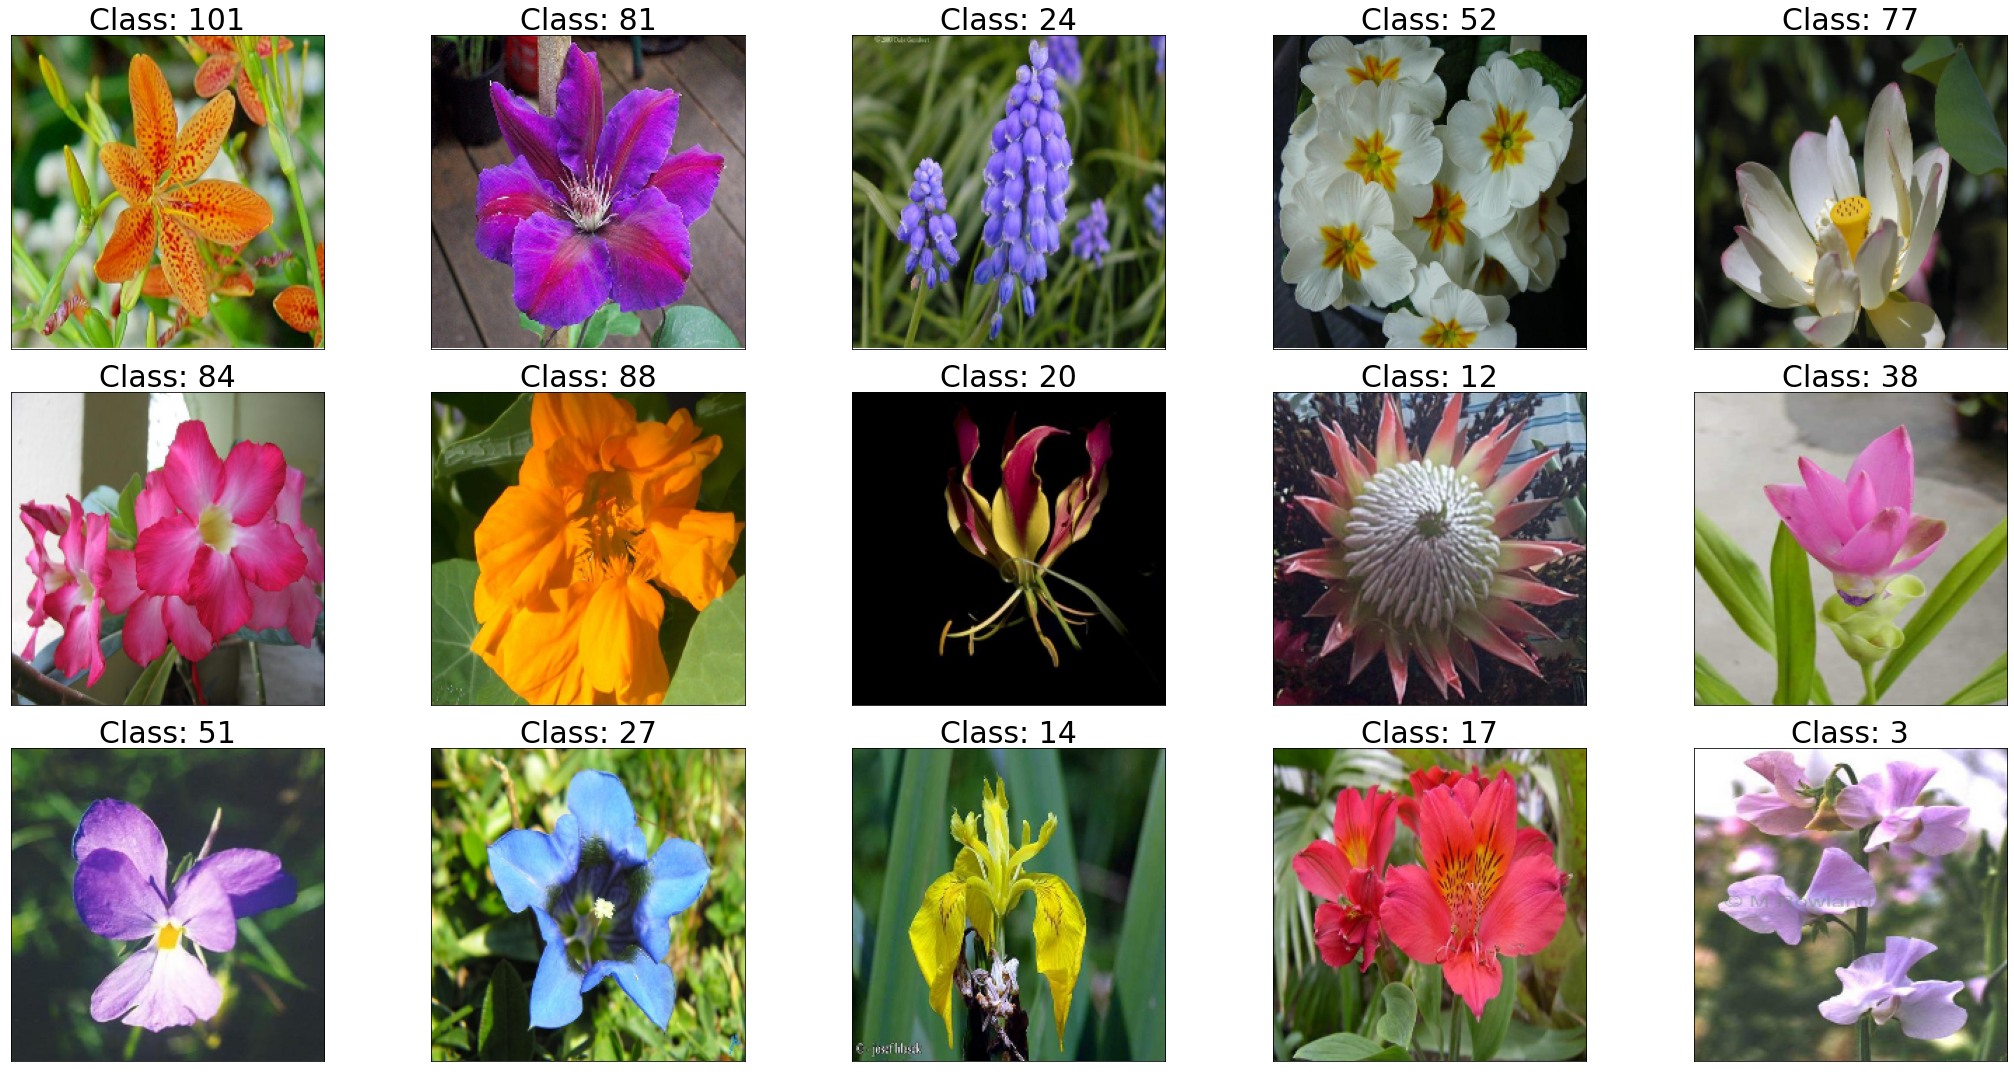

In [4]:
transforms = Compose([ToTensor(), Resize([224, 224])])
dataset = Flowers102(root=".", split="train", transform=transforms, download=True)
loader = DataLoader(dataset, batch_size=15, shuffle=True)

# get a single batch
for x, y in loader:
    break

# prepare visualisations
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(30, 15))
for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        ind = 5 * i + j
        ax.imshow(np.transpose(x[ind], (1, 2, 0)))
        ax.set_title(f"Class: {y[ind]}", fontdict={'size': 30})
        ax.set_xticks([])
        ax.set_yticks([])

fig.tight_layout()

In [5]:
torch.cuda.empty_cache()

In [7]:
# check if parameter freezing works well

weights = ViT_B_16_Weights.IMAGENET1K_V1
model = vit_b_16(progress=True, weights=weights).to(device)

unfreeze_params(model, True)
print(len([p for p in model.parameters() if p.requires_grad]) == 150)
unfreeze_params(model, True, True)
print(len([p for p in model.parameters() if p.requires_grad]) == 152)
unfreeze_params(model, False)
print(len([p for p in model.parameters() if p.requires_grad]) == 2)

True
True
True


In [8]:
datasets = load_and_transform(f = 0.8)

Sizes of datasets:  816 204 6149
Checking training dataset: 
There's at leas 1 instance of each class
Checking validation dataset: 
At least one class is not represented in this set


In [14]:
# Define the params grid for our random search and set the maximum number of trials
basic_model = BasicViT()
torch.save(basic_model, "BASIC_MODEL.pt")  # save a baseline model, to be loaded during params search
criterion = nn.CrossEntropyLoss()

# param_grid = {
#                 'lr': [0.001, 0.0005, 0.0001],
#                 'epochs_num': [2, 3, 4],
#                 'batch_size': [32, 64, 96],
#              }

# max_num_sets = 10

param_grid = {
                'lr': [0.001],
                'epochs_num': [4],
                'batch_size': [32],
             }

max_num_sets = 1

best_params = find_best_params(param_grid, max_num_sets, criterion, datasets, unfreezed=True,\
                               ViT_path = "BASIC_MODEL.pt")

After switching grads ON:  150
Training with freezed params, epoch = 1
Training with freezed params, epoch = 2
Training with freezed params, epoch = 3
Training with unfreezed params, last epoch
Model trained, valid accuracy: 0.8137
Test accuracy: 0.8538


In [15]:
torch.cuda.empty_cache()

In [16]:
best_params = find_best_params(param_grid, max_num_sets, criterion, datasets, unfreezed=True,\
                               at_beginning=True, ViT_path = "BASIC_MODEL.pt")

After switching grads ON:  150
Training with unfreezed params, first epoch
Training with freezed params, epoch = 2
Training with freezed params, epoch = 3
Training with freezed params, epoch = 4
Model trained, valid accuracy: 0.8235
Test accuracy: 0.8070


In [18]:
torch.cuda.empty_cache()

In [19]:
best_params = find_best_params(param_grid, max_num_sets, criterion, datasets, unfreezed=False, ViT_path = "BASIC_MODEL.pt")

Training with freezed params, epoch = 1
Training with freezed params, epoch = 2
Training with freezed params, epoch = 3
Training with freezed params, epoch = 4
Model trained, valid accuracy: 0.7255
Test accuracy: 0.7416


In [20]:
torch.cuda.empty_cache()